# Fancy borders for cylindrical projections in basemap
Here is a work around for creating fancy borders (GMT style) for cylindrical projections in basemap.  I am sure better solutions exist but I haven't seen any so far. 

In [26]:
import numpy as np
from   mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
% matplotlib inline

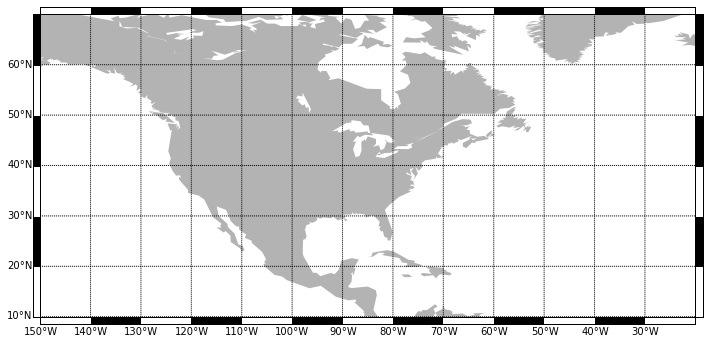

In [28]:
# Establish latlon bounding box
lat_min = 10
lat_max = 70
lon_min = 210
lon_max = 340

# Create figure and basemap instances
plt.figure(figsize=(12,10))
ax = plt.subplot(111)
map = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,\
                    rsphere=(6378137.00,6356752.3142),\
                   resolution='c',projection='cyl',\
                    lat_1=68.0,lon_0=-46.0)
map.fillcontinents(color='0.7')
par = np.arange(lat_min, lat_max, 10)
# xoffset and yoffset paramaters may need to be adjust so bounding box doesnt cover labels
map.drawparallels(par,labels=[1,0,0,0], xoffset=1.5, fmt='%.f');
mer = np.arange(lon_min, lon_max, 10)
map.drawmeridians(mer,labels=[0,0,0,1], yoffset=2, fmt='%.f');

# Divide ax
divider = make_axes_locatable(ax)
axyr = divider.append_axes("right" , size = 0.1, pad = 0.0)
axyl = divider.append_axes("left"  , size = 0.1, pad = 0.0)
axxt = divider.append_axes("top"   , size = 0.1, pad = 0.0)
axxb = divider.append_axes("bottom", size = 0.1, pad = 0.0)

#Turn off labels for appended axes
axyr.set_xticks([]); axyr.set_yticks([]);
axyl.set_xticks([]); axyl.set_yticks([]);
axxt.set_xticks([]); axxt.set_yticks([]);
axxb.set_xticks([]); axxb.set_yticks([]);

# Lat border box locations
locsy = par - lat_min
sz    = lat_max - lat_min
locsy = locsy / sz

for i in range(0, len(locsy)):
    if i%2 == 1:
        c= 'k'
    else:
        c= 'w'
    axyr.add_patch(patches.Rectangle((0, locsy[i]),1, sz/len(locsy), color=c))
    axyl.add_patch(patches.Rectangle((0, locsy[i]),1, sz/len(locsy), color=c))

# Lon border box locations
locsx = mer - lon_min
sz    =  lon_max - lon_min
locsx = locsx/sz

for i in range(0, len(locsx)):
    if i%2 == 1:
        c= 'k'
    else:
        c= 'w'
    axxt.add_patch(patches.Rectangle((locsx[i], 0 ), sz/len(locsx), 1, color=c))
    axxb.add_patch(patches.Rectangle((locsx[i] ,0 ), sz/len(locsx), 1, color=c))